# PCA

**Important Parameters**

**Relevant Information**

## Important Parameters

Let's work with Iris Dataset

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [6]:
#Load the dataset 
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
for c in ["sepal_length", "sepal_width", "petal_length", "petal_width"]:
    # Standarize 
    df[c] = (df[c] - df[c].mean())/df[c].std()

df

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.897674,1.015602,-1.335752,-1.311052,0
1,-1.139200,-0.131539,-1.335752,-1.311052,0
2,-1.380727,0.327318,-1.392399,-1.311052,0
3,-1.501490,0.097889,-1.279104,-1.311052,0
4,-1.018437,1.245030,-1.335752,-1.311052,0
...,...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994,2
146,0.551486,-1.278680,0.703564,0.919223,2
147,0.793012,-0.131539,0.816859,1.050416,2
148,0.430722,0.786174,0.930154,1.443994,2


In [15]:
# Fit PCA model 
X = df.drop(columns=["target"])
y = df["target"]

pca = PCA(n_components=2)
pca.fit(X)
df_pca = pca.transform(X)
df_pca = pd.DataFrame(df_pca, columns=["pca_1", "pca_2"])
df_pca["target"] = y 
df_pca

,pca_1,pca_2,target
0,-2.257141,0.478424,0
1,-2.074013,-0.671883,0
2,-2.356335,-0.340766,0
3,-2.291707,-0.595400,0
4,-2.381863,0.644676,0
...,...,...,...
145,1.864258,0.385674,2
146,1.559356,-0.893693,2
147,1.516091,0.268171,2
148,1.368204,1.007878,2


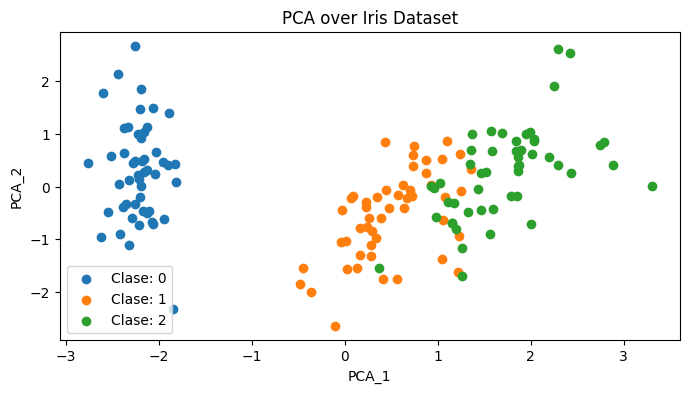

In [22]:
plt.figure(figsize=(8,4))
for c in df_pca.target.unique():
    df_pca_loc = df_pca.loc[df_pca.target == c].copy()
    plt.scatter(df_pca_loc.pca_1, df_pca_loc.pca_2, label = f'Clase: {c}')
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.title("PCA over Iris Dataset")
plt.legend()
plt.savefig("img/pca_over_iris.png", dpi = 300, bbox_inches='tight')
plt.show()